In [145]:
# Import libraries
import pandas as pd

# Load the dataset using pandas csv method
# Save the dataset in varibale called data
data = pd.read_csv('car_data.csv')

In [146]:
# Call the data head () to glance at the shape
data.head()

,weight,hwy_mpg
0,2548,27
1,2548,27
2,2823,26
3,2337,30
4,2824,22


In [147]:
# Call the datahead to glance at the independent and dependent variables
data_ = data.loc[:,['weight', 'hwy_mpg']]
data_.head(5)

,weight,hwy_mpg
0,2548,27
1,2548,27
2,2823,26
3,2337,30
4,2824,22


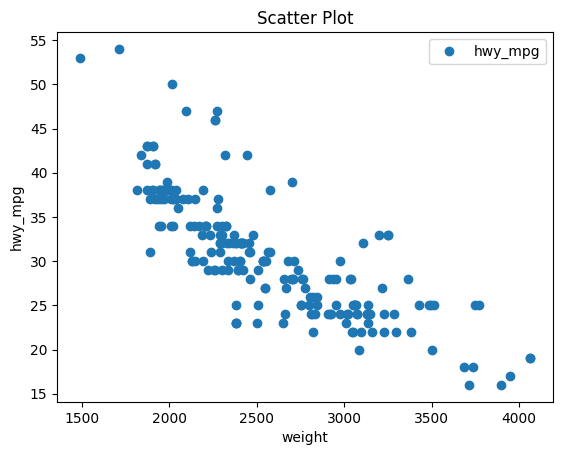

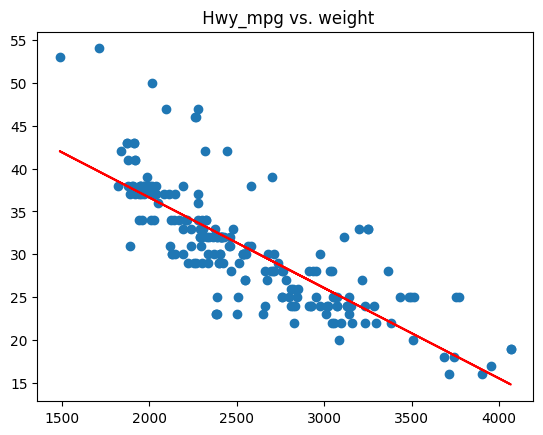

In [178]:
# Question 1."Make a scatterplot of the highway miles per gallon (y-axis) versus the weight (x-axis)."

# import  libraries
import matplotlib.pyplot as plt

# Visualize the change in  variables
data.plot( x= 'weight', y= 'hwy_mpg', style = 'o' )
plt.xlabel('weight')
plt.ylabel('hwy_mpg')
plt.title('Scatter Plot')
plt.show()

# Question 2. "Based on your plot, what is the general trend of how highway miles per gallon varies with the weight?"
x = np.array(data.weight)
y = np.array(data.hwy_mpg)

# Visualize the change in variables to show trend

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title(' Hwy_mpg vs. weight')
plt.plot(x, p(x), 'r')


In [181]:
# Question 3."If you were to build a linear model using this data to predict highway miles per gallon from weight, would you expect the slope to be positive or negative? Explain."

def linear_regression(x,y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()


# Calculate the slope 
B1_num = ((x-x_mean) * (y - y_mean)).sum()
B1_den = ((x-x_mean) **2).sum()
B1 = B1_num / B1_den

# Calculate the intercept
B0 = y_mean - (B1 * x_mean)

print('intercept is', B0)
print('slope is', B1)
print ('The slope is expected to be negative given y=mx+b ')

intercept is 57.70517422574473
slope is -0.01054715716871958
The slope is expected to be negative given y=mx+b 


intercept is 158.52951219512195


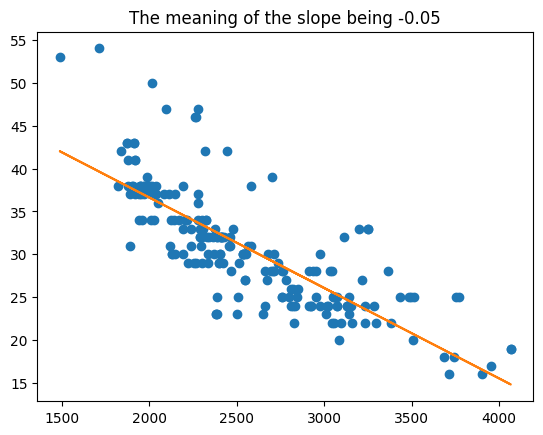

In [196]:
# Question 4."If the slope of a linear model predicting highway miles per gallon from the weight, interpret the meaning of the slope being −0.05."

# The slope is given, -0.05  
# Calculate the intercept (b = y-m*x)

B0 = (y_mean) - (-0.05 * x_mean)

# Visualize the change in variables

plt.plot(x, y, 'o')

# m = slope(B1)
# b = y-intercept(B0)

m = -0.05
b = 158.52951219512195

m, b = np.polyfit(x, y, 1)
plt.title('The meaning of the slope being -0.05')
plt.plot(x, m*x+b)
print('intercept is', B0)

intercept is 57.70517422574473
slope is -0.01054715716871958


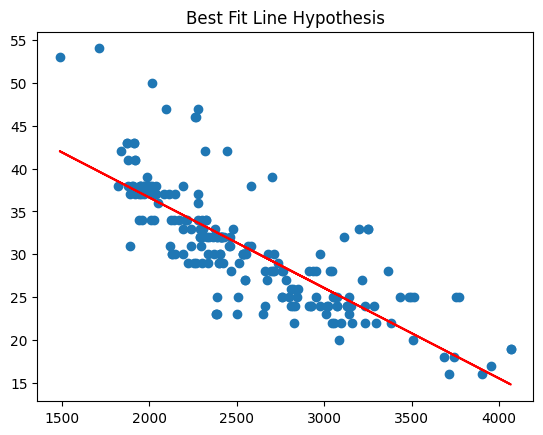

In [195]:
# Question 5. 
#"Write code to add a line to the graph you made in problem (1). 
#Adjust the slope and y-intercept of this line until you think you have found the line that best fits the data. 
#Record the slope and y-intercept."

x = np.array(data.weight)
y = np.array(data.hwy_mpg)

# Visualize the change in variables to show trend

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title('Best Fit Line Hypothesis')
plt.plot(x, p(x), 'r')

def linear_regression(x,y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()


# Calculate the slope 
B1_num = ((x-x_mean) * (y - y_mean)).sum()
B1_den = ((x-x_mean) **2).sum()
B1 = B1_num / B1_den

# Calculate the intercept
B0 = y_mean - (B1 * x_mean)

print('intercept is', B0)
print('slope is', B1)

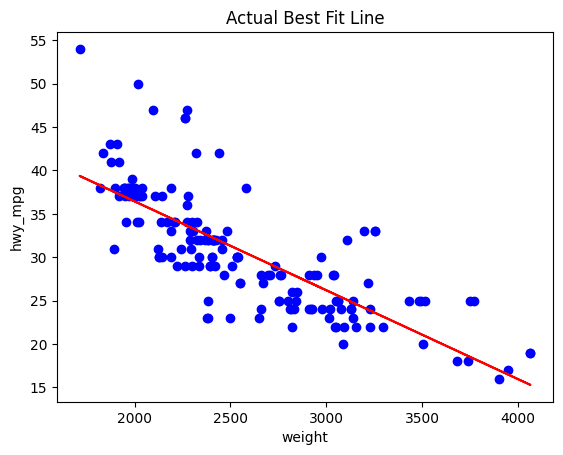

In [189]:
# Question 6. "Use Python to find the best-fit line. The Scikit-learn package is a good choice to use for this."
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = data
X = np.array(data.weight)
y = np.array(data.hwy_mpg)



X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=0)

linearRegressor = LinearRegression()

linearRegressor.fit(X_train.reshape(-1,1), y_train)

yPrediction = linearRegressor.predict(X_test)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, linearRegressor.predict(X_train), color='r')
plt.xlabel('weight')
plt.ylabel('hwy_mpg')
plt.title('Actual Best Fit Line')
plt.show()

In [197]:
# Question 7. "Find the root mean squared error (RMSE) of the prediction line you found in problem (4)
# "and the actual best-fit line found in problem (5)."
#"How do these compare?"

yhat = 158.52951219512195+(-0.05)*x
d = y -yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2))/sum((y-np.mean(y))**2)

print ("Root Means Squared Error from problem 4 is:", rmse_f)

Root Means Squared Error from problem 4 is: 20.907136598244538


In [199]:
yhat = 57.70517422574473+-0.01054715716871958*x
d = y -yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2))/sum((y-np.mean(y))**2)

print ("Root Means Squared Error from problem 5 is:", rmse_f)

Root Means Squared Error from problem 5 is: 4.144895442072008


In [200]:
print( 'The RMSE calculated from problem 5 is > the RMSE calculated in problem 4')
print('Thus the model from problem 5, shows that the observed data points are closer to the model prediction values than that of the model from problem 4.')

The RMSE calculated from problem 5 is > the RMSE calculated in problem 4
Thus the model from problem 5, shows that the observed data points are closer to the model prediction values than that of the model from problem 4


In [207]:
# Question 8."Use the best-fit line in problem (5) to predict the highway mpg of a car that weighs 3200 pounds."
import numpy as np
x = np.array(data.weight)
y = np.array(data.hwy_mpg)
y2 = np.interp(3200, x,y)
print('highway mpg of a car that weighs 3200 pounds is',y2)

highway mpg of a car that weighs 3200 pounds is 25.0
